In [1]:
import pandas as pd

board_games = pd.read_csv("board_games.csv")
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [2]:
board_games.dropna(inplace=True, axis=0)
board_games = board_games[board_games["users_rated"] > 0]

In [3]:
board_games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


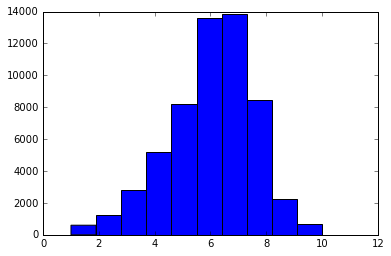

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(board_games["average_rating"])
plt.show()

In [5]:
print(board_games["average_rating"].mean())
print(board_games["average_rating"].std())

6.01611284933
1.57882993483


using **mean squared error** makes sense because the ratings are continuous values and follow a normal distribution to some extent.

In [6]:
board_games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [7]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=None)
numeric_colunames = ['yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight']
numeric_columns = board_games[numeric_colunames]
model = kmeans.fit(numeric_columns)
labels = model.labels_

In [8]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

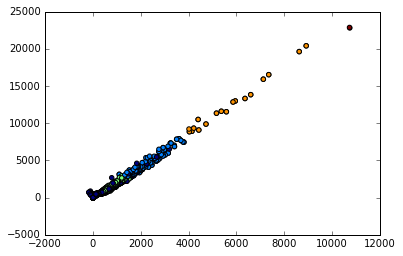

In [9]:
game_mean = numeric_columns.apply(np.mean, axis=1)
game_std = numeric_columns.apply(np.std, axis=1)
plt.scatter(x=game_mean, y=game_std, c=labels)
plt.show()

In [10]:
correlations = numeric_columns.corr()
print(correlations["average_rating"])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


the correlation between yearpublished and average rating surprises me, it seems that the more recent games tend to get a high average ratings. I'll build a model based on yearpublished, minage and average weight to predict the average rating of board games.

In [11]:
from sklearn.linear_model import LinearRegression
import numpy

reg = LinearRegression()
reg.fit(numeric_columns[["yearpublished","minage","average_weight"]],numeric_columns["average_rating"])
predictions = reg.predict(numeric_columns[["yearpublished","minage","average_weight"]])
mse = numpy.mean((predictions - numeric_columns["average_rating"]) ** 2)

In [12]:
mse

2.1405805187011264

in the following, I'll build another linear model using more parameters.

In [13]:
filtered_df = numeric_columns.drop(["average_rating","bayes_average_rating"], axis=1)

In [14]:
reg_1 = LinearRegression()
reg_1.fit(filtered_df, numeric_columns["average_rating"])
predictions_1 = reg_1.predict(filtered_df)
mse_1 = numpy.mean((predictions_1 - numeric_columns["average_rating"]) ** 2)

In [15]:
mse_1

2.0933969758339361

comparing mse_1 to mse, we can learn that using more parameters can produce a more predictive model, but in general, both of two models are bad for predicting average rating of board games.